<a href="https://colab.research.google.com/github/rioAgustian/image_processing/blob/main/filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Filtering**

**Rio Agustian Gilang Fernando**

**Fisika**

**Fakultas Matematika dan Ilmu Pengetahuan Alam UNNES**

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## **Average Filter**

Average filter itu untuk pemburaman.

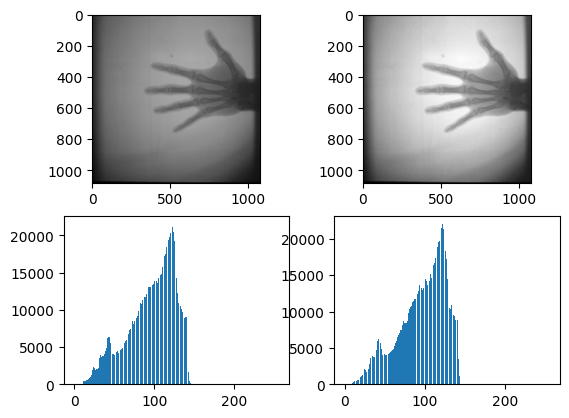

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Citra original
img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/hand.png", 0)

kernel = np.ones((3, 3))/9
img1 = cv.filter2D(img, -1, kernel)

# Histogram 
hist, bins = np.histogram(img, bins=256, range=[0, 256])
hist1, bins1 = np.histogram(img1, bins=256, range=[0, 256])

plt.subplot(221)
plt.imshow(img, cmap="gray")

plt.subplot(222)
plt.imshow(img1, cmap="gray")

plt.subplot(223)
plt.bar(bins[:-1], hist)

plt.subplot(224)
plt.bar(bins1[:-1], hist1)
plt.show()

## **Weighting Filter**

Hampir sama dengan average filter, tapi bobot kernal yang tengah lebih besar.

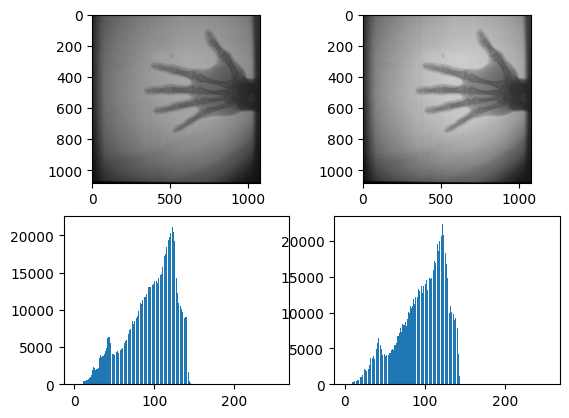

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Citra original
img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/hand.png", 0)

kernel = [[1/18,  1/18, 1/18], 
          [1/18, 10/18, 1/18], 
          [1/18,  1/18, 1/18]]
kernel = np.array(kernel)
img1 = cv.filter2D(img, -1, kernel)

# Histogram 
hist, bins = np.histogram(img, bins=256, range=[0, 256])
hist1, bins1 = np.histogram(img1, bins=256, range=[0, 256])

plt.subplot(221)
plt.imshow(img, cmap="gray")

plt.subplot(222)
plt.imshow(img1, cmap="gray")

plt.subplot(223)
plt.bar(bins[:-1], hist)

plt.subplot(224)
plt.bar(bins1[:-1], hist1)
plt.show()

## **Sobel**

Sobel ini untuk penajaman tepi. Ada juga Prewitt, bedanya di kernel yang digunakan.

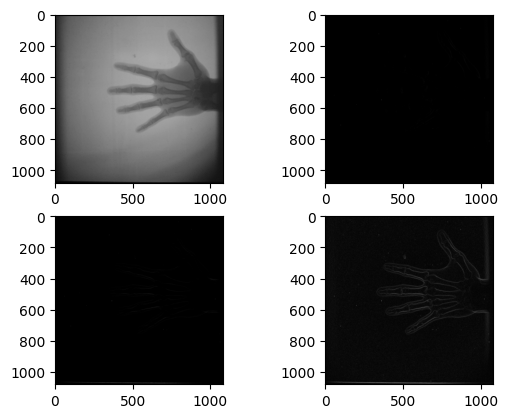

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/hand.png", 0)

kernel_h = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])
kernel_v = np.array([[-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]])

sobel_h = cv.filter2D(img, cv.CV_64F, kernel_h)
sobel_v = cv.filter2D(img, cv.CV_64F, kernel_v)

sobel_h2 = np.square(sobel_h)
sobel_v2 = np.square(sobel_v)
sobel_a = np.sqrt(cv.add(sobel_h2, sobel_v2))

plt.subplot(221)
plt.imshow(img, cmap="gray")

plt.subplot(222)
plt.imshow(sobel_h2, cmap="gray")

plt.subplot(223)
plt.imshow(sobel_v2, cmap="gray")

plt.subplot(224)
plt.imshow(sobel_a, cmap="gray")

plt.show()

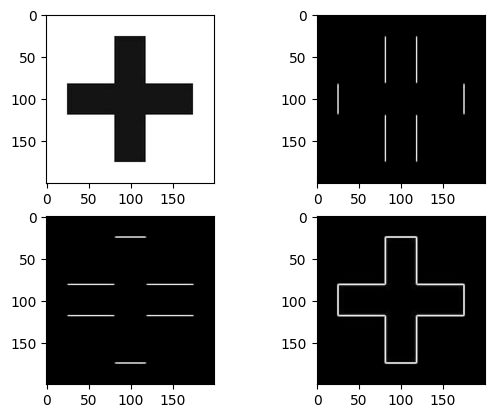

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/sign.jpg", 0)

# Kernel Sobel
sob_hor = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
sob_ver = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

# List ke numpy array
sob_hor = np.array(sob_hor)
sob_ver = np.array(sob_ver)

# Menggunakan filter Sobel
hor = cv.filter2D(img, cv.CV_64F, sob_hor)
ver = cv.filter2D(img, cv.CV_64F, sob_ver)

# Magnitudo
hor2 = np.square(hor)
ver2 = np.square(ver)
mag = np.sqrt(np.add(hor2, ver2))


plt.subplot(221)
plt.imshow(img, cmap="gray")

plt.subplot(222)
plt.imshow(hor2, cmap="gray")

plt.subplot(223)
plt.imshow(ver2, cmap="gray")

plt.subplot(224)
plt.imshow(mag, cmap="gray")
plt.show()


## **Laplacian of Gaussian**

Sebelum ditajamkan dengan Laplacian, citra mula-mula dikenai Gaussian Blur.

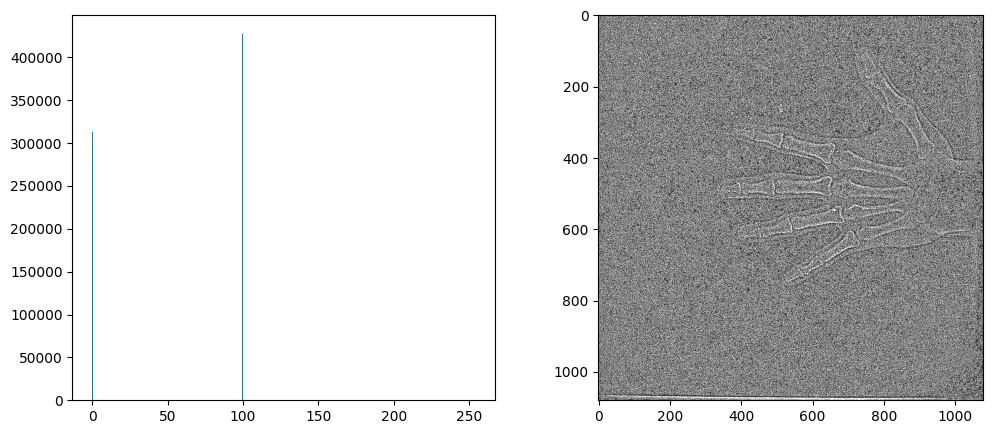

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/hand.png", 0)

# Filter Laplacian
lap = cv.Laplacian(img, cv.CV_64F)

# Laplacian of gaussian
blur = cv.GaussianBlur(img, (3,3), 1)
LoG  = cv.Laplacian(blur, cv.CV_64F) 
LoG[LoG > 0] = 100 # ini untuk menaikan intensitas citra

plt.figure(figsize=(12,5))

plt.subplot(121)
hist, bins = np.histogram(LoG, bins=256, range=[0, 255])
plt.bar(bins[:-1], hist);

plt.subplot(122)
plt.imshow(LoG, cmap="gray");

# **Robinson Compass Masks**

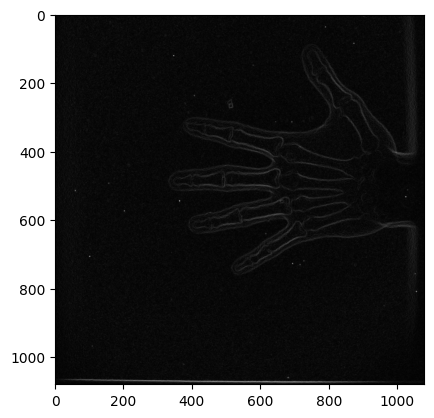

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/hand.png", 0)

# Kernel 
N  = [[-1,  0,  1],
      [-2,  0,  2],
      [-1,  0,  1]]
NW = [[ 0,  1,  2],
      [-1,  0,  1],
      [-2, -1,  0]]
W  = [[ 1,  2,  1],
      [ 0,  0,  0],
      [-1, -2, -1]]
SW = [[ 2,  1,  0],
      [ 1,  0, -1],
      [ 0, -1, -2]]
S  = [[ 1,  0, -1],
      [ 2,  0, -2],
      [ 1,  0, -1]]
SE = [[ 0, -1, -2],
      [ 1,  0, -1],
      [ 2,  1,  0]]
E  = [[-1, -2, -1],
      [ 0,  0,  0],
      [ 1,  2,  1]]
NE = [[-2, -1,  0],
      [-1,  0,  1],
      [ 0,  1,  2]]

arah = [N, NW, W, SW, S, SE, E, NE]

arah_array = []
for i in range(len(arah)):
  i = np.array(arah[i])
  arah_array.append(i)

output = np.zeros_like(img)
for i in range(len(arah_array)):
  kernel = arah_array[i]
  temp = cv.filter2D(img, -1, kernel)
  output = cv.max(output, temp)

# output = output.astype(np.uint8)

plt.imshow(output, cmap="gray")
plt.show()